<a href="https://colab.research.google.com/github/bigboivan/MAT422/blob/main/HW3_MAT422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[17  8]
 [ 8 17]]
[25.  9.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Our U matrix is: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Our sigma matrix is: 
 [[5. 0. 0.]
 [0. 3. 0.]]
Our V matrix is: 
 [[ 0.70710678  0.70710678  0.        ]
 [ 0.23570226 -0.23570226  0.94280904]
 [ 0.66666667 -0.66666667 -0.33333333]]
U multiplied by sigma is: 
 [[ 3.53553391 -2.12132034  0.        ]
 [ 3.53553391  2.12132034  0.        ]]
[[ 2.  3. -2.]
 [ 3.  2.  2.]]
The rank of matrix A is:  2
[[3.53553391 0.         0.        ]
 [3.53553391 0.         0.        ]]
The approximated rank 1 matrix is: 
 [[2.5 2.5 0. ]
 [2.5 2.5 0. ]]
[[1 1]
 [2 1]
 [2 4]
 [3 1]
 [4 4]
 [5 2]
 [6 4]
 [6 6]
 [7 6]
 [8 8]]
4.4
3.7
[[-3.4 -2.7]
 [-2.4 -2.7]
 [-2.4  0.3]
 [-1.4 -2.7]
 [-0.4  0.3]
 [ 0.6 -1.7]
 [ 1.6  0.3]
 [ 1.6  2.3]
 [ 2.6  2.3]
 [ 3.6  4.3]]
[[5.6        4.8       ]
 [4.8        6.01111111]]
The eigenvalues of this sigma matrix are: 
 [ 1.00115621 10.6099549 ]
The eigenvectors of

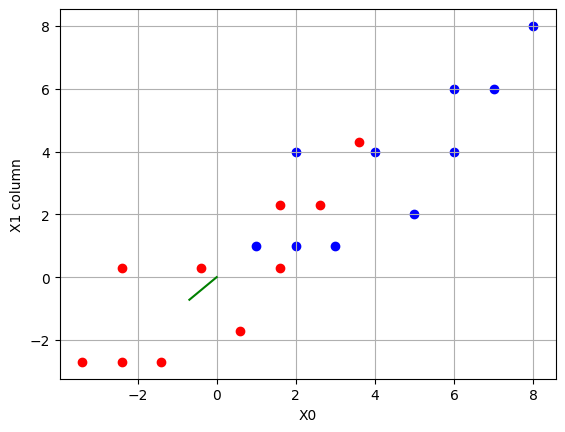

In [49]:
## HW 1 - Ivan Matyushov
## MAT 422 - Mathematical Methods in Data Science

## Part 1 - Singular Value Decomposition
## SVD Factorization breaks down a matrix into three smaller matrices UΣV

#The single values can be calculated by taking A*A^T
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig # import to use eig function
from numpy import linalg as LA
A = np.array([[3, 2, 2], [2, 3, -2]])
A_At = A @ A.transpose()
print(A_At)
# Find eigenvalues of A * A^T matrix
u,v = eig(A_At)
print(u)
print(v)
U = v #this gives us the U matrix of the UΣV needed
print('Our U matrix is: \n', U)
sigma = np.array([[np.sqrt(u[0]),0,0], [0, np.sqrt(u[1]), 0]])
print('Our sigma matrix is: \n', sigma)
v1 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0]) #Unit vector for lambda = 25
v2 = np.array([1/np.sqrt(18), -1/np.sqrt(18), 4/np.sqrt(18)]) #Unit vector for lambda = 9
v3 = np.array([2/3, -2/3, -1/3])
V = np.array([v1, v2, v3])
print('Our V matrix is: \n', V)
U_sigma = U @ sigma
print('U multiplied by sigma is: \n', U_sigma)
A_confirm = U_sigma @ V
print(A_confirm) #This combo gives back A so the SVD decomposition works.

## Part 2 - Low-rank approximations
rank_check = np.linalg.matrix_rank(A) #checks rank of original matrix A - gives rank 2
print('The rank of matrix A is: ', rank_check)
sigma = np.array([[np.sqrt(u[0]),0,0], [0, 0, 0]]) #reduces the rank of sigma from rank 2 to rank 1
U_sigma1 = U @ sigma
print(U_sigma1)
A_rank1 = U_sigma1 @ V
print('The approximated rank 1 matrix is: \n', A_rank1) #Estimate is off by quite a bit as the rank is lowered to the lowest rank of 1.

## Part 3 - Principal Component Analysis
X = np.array([[1, 1], [2, 1], [2,4], [3,1], [4,4], [5,2], [6,4], [6,6], [7,6], [8,8]])
print(X)
mean_col1 = np.mean(X[:, 0])
print(mean_col1)
mean_col2 = np.mean(X[:, 1])
print(mean_col2)
center_X = X - np.array([[4.4, 3.7], [4.4, 3.7], [4.4, 3.7], [4.4, 3.7], [4.4, 3.7], [4.4, 3.7], [4.4, 3.7], [4.4, 3.7], [4.4, 3.7], [4.4, 3.7]])
print(center_X)
sigma = 1/9 * (np.transpose(center_X) @ center_X)
print(sigma)
eigenvalues, eigenvectors = LA.eig(sigma)
print('The eigenvalues of this sigma matrix are: \n', eigenvalues)
print('The eigenvectors of this sigma matrix are: \n', eigenvectors)
print('The first principal component is: ', eigenvectors[0, :])
print('The second principal component is: ', eigenvectors[1, :])


# Plot data points
plt.scatter(X[:, 0], X[:, 1], c='b', label='Scatter Plot') #Original data points
plt.scatter(center_X[:, 0], center_X[:, 1], c='r', label='Scatter Plot') #Centered data points
prin_comp1_x=np.array([0, -0.69])
prin_comp1_y=np.array([0, -0.72])
plt.plot(prin_comp1_x, prin_comp1_y, color='g', label='Principle Component 1') #Green line shows direction of first principle component vector.
plt.grid(True)
plt.xlabel('X0')
plt.ylabel('X1 column')
plt.show()
